### Gaussian Density Functions

Machine Learning Algorithms

Dates: 2022-3-18

Author: Yung-Kyun Noh

Department of Computer Science, Hanyang University & KIAS


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def logGaussian(xs, mu, Sig):
    if xs.ndim == 1:
        dim = 1
        log_ps = -0.5*dim*np.log(2*np.pi) - 0.5*np.log(Sig)
        log_ps += -0.5*(xs - mu)**2/Sig
    else:
        dim = len(xs[0])
        mu = mu.reshape(1,-1)
        log_ps = -0.5*dim*np.log(2*np.pi) - 0.5*np.log(np.linalg.det(Sig))
        invSig = np.linalg.inv(Sig)
        log_ps += -0.5*np.diag(np.matmul(np.matmul((xs - mu), invSig), (xs - mu).T))

    return log_ps

In [4]:
mu = np.array([0.5,1])
Sig = np.array([[3,2],[2,3]])

# Examples
xs = np.array([[1,2],[2,3], [3,4]])
logGaussian(xs, mu, Sig)

array([-2.81759602, -3.31759602, -4.21759602])

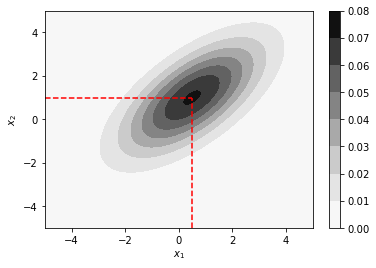

In [13]:
grid_num = 100
x1 = np.linspace(-5,5,grid_num)
x2 = np.linspace(-5,5,grid_num)
X,Y = np.meshgrid(x1,x2)
xs = np.concatenate([X.reshape([-1,1]), Y.reshape([-1,1])], axis=1)
log_ps = logGaussian(xs, mu, Sig)

log_ps = np.reshape(log_ps, [grid_num,grid_num])

cs = plt.contourf(X, Y, np.exp(log_ps), cmap="Greys")
plt.colorbar(cs)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.plot([-5, mu[0]], [mu[1], mu[1]], 'r--')
plt.plot([mu[0], mu[0]], [-5, mu[1]], 'r--')

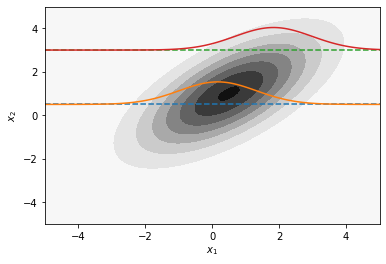

In [14]:
cs = plt.contourf(X, Y, np.exp(log_ps), cmap="Greys")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# fix x2 = 0.5
x2 = 0.5
plt.plot([-5,5], [x2,x2], '--')
m1given2 = mu[0] + Sig[0,1]/Sig[1,1]*(x2 - mu[1])
sig1given2 = Sig[0,1]/Sig[1,1]*Sig[1,0]

grid_num = 100
xs = np.linspace(-5,5,grid_num)
log_ps1 = logGaussian(xs, m1given2, sig1given2)
ps = np.exp(log_ps1)

magnifier = 3
plt.plot(xs, ps*magnifier + x2)

# fix x2 = 3
x2 = 3
plt.plot([-5,5], [x2,x2], '--')
m1given2 = mu[0] + Sig[0,1]/Sig[1,1]*(x2 - mu[1])
sig1given2 = Sig[0,1]/Sig[1,1]*Sig[1,0]

grid_num = 100
xs = np.linspace(-5,5,grid_num)
log_ps1 = logGaussian(xs, m1given2, sig1given2)
ps = np.exp(log_ps1)

magnifier = 3
plt.plot(xs, ps*magnifier + x2)


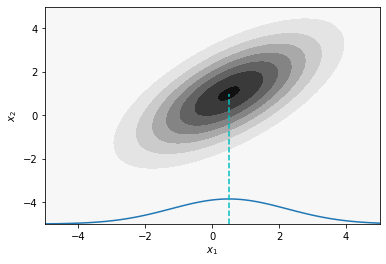

In [18]:
cs = plt.contourf(X, Y, np.exp(log_ps), cmap="Greys")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# fix x2 = 0.5
x2 = 0.5
m1_marginal = mu[0]
sig1_marginal = Sig[0,0]

grid_num = 100
xs = np.linspace(-5,5,grid_num)
log_ps1 = logGaussian(xs, m1_marginal, sig1_marginal)
ps = np.exp(log_ps1)

magnifier = 5
plot_location_x2 = -5
plt.plot(xs, ps*magnifier + plot_location_x2)

plt.plot([mu[0], mu[0]], [-5, mu[1]], 'c--')
